<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Agenda" data-toc-modified-id="Agenda-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Agenda</a></span></li><li><span><a href="#What-Has-Calculus-Done-For-You" data-toc-modified-id="What-Has-Calculus-Done-For-You-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What Has Calculus Done For You</a></span></li><li><span><a href="#Differentiation" data-toc-modified-id="Differentiation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Differentiation</a></span><ul class="toc-item"><li><span><a href="#Common-Derivatives" data-toc-modified-id="Common-Derivatives-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Common Derivatives</a></span></li><li><span><a href="#sympy" data-toc-modified-id="sympy-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><code>sympy</code></a></span></li></ul></li><li><span><a href="#Integration" data-toc-modified-id="Integration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Integration</a></span><ul class="toc-item"><li><span><a href="#Common-Integrals" data-toc-modified-id="Common-Integrals-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Common Integrals</a></span></li><li><span><a href="#sympy" data-toc-modified-id="sympy-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><code>sympy</code></a></span></li></ul></li><li><span><a href="#The-Chain-Rule" data-toc-modified-id="The-Chain-Rule-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>The Chain Rule</a></span><ul class="toc-item"><li><span><a href="#Exercise:" data-toc-modified-id="Exercise:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Exercise:</a></span></li></ul></li><li><span><a href="#Partial-Differentiation" data-toc-modified-id="Partial-Differentiation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Partial Differentiation</a></span></li></ul></div>

![Calculus at Harvard](https://online-learning.harvard.edu/sites/default/files/styles/header/public/course/asset-v1_HarvardX%2BCalcAPL1x%2B2T2017%2Btype%40asset%2Bblock%40TITLE-Calculus-Applied-2120x1192-NO-SPOTLIGHT%202.png?itok=crWwjmVi)

# Calculus for Data Scientists

> NOTE: `sympy` is not a paackage that comes included in the `learn-env`. You can install it by running the command below though here in the notebook or in your terminal (with `learn-env` activated). You might have to restart the kernel after installation.

In [2]:
# conda install -c anaconda sympy

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sympy import *
from sympy.abc import x, y
from scipy import stats

## Agenda

SWBAT:

- Perform simple derivatives and indefinite integrals;
- Use the Chain Rule to construct derivatives of complex functions;
- Construct partial derivatives for functions of multiple variables.

## What Has Calculus Done For You

![](https://media2.giphy.com/media/3o6MbqEixpSlSscQdG/source.gif)

We have already had occasion to use calculus in a few places. Calculus shows us:

- that the mean of a group of numbers is the number $n$ that minimizes the sum of squared differences $\Sigma(p-n)^2$ for each number $p$ in the group;
- that the median of a group of numbers is the number $n$ that minimizes the sum of absolute differences $\Sigma|p-n|$ for each number $p$ in the group;
- how to find the coefficients for a linear regression optimization problem.

The two main tools of calculus are **differentiation** and **integration**. For functions of one dimension:

- Differentiation gives us the *slope* of the function at any point.
- Integration gives us the *area under the curve* of the function between any two points.

![calc](https://t3.ftcdn.net/jpg/04/02/03/54/240_F_402035410_ihv2bsAJAWRLG1BiFGtpiCUEMJXVxtbW.jpg)

Surprisingly, these two operations turn out to be inverses of one another in the sense that the derivative of the integral of a given function takes us back to the initial function:

$\frac{d}{dx}[\int^x_a f(t) dt] = f(x)$. This is known as the First Fundamental Theorem of Calculus.

## Differentiation

To find the slope of a function *at a point*, we imagine calculating the slope of the function between two points, and then gradually bringing those two points together. Consider the slope of the function $y=x^2$ at the point $x=100$.

We'll calculate the slope of the parabola between $x_1=100$ and $x_2=1000$, and then slowly move $x_2$ close to $x_1$:

In [3]:
10**(7/3)

215.44346900318845

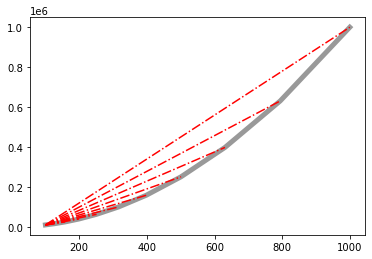

In [4]:
X = np.logspace(3, 2, 11)

fig, ax = plt.subplots()
ax.plot(X, X**2, lw=5, c='k', alpha=0.4)
for x_ in X[:-1]:
    ax.plot([100, x_], [10000, x_**2], 'r-.')

In [ ]:
# This will show how the slope approaches the value
# of the derivative

slopes = []
for x_ in X[:-1]:
    slopes.append((x_**2-10000) / (x_-100))
    
fig, ax = plt.subplots()
ax.plot(X[:-1], slopes, label='approximation')
ax.scatter(X[-1], 200, label='value of derivative at $x=100$', c='r')
ax.set_xlabel('X')
ax.set_ylabel('slope')
ax.set_title('slope between x=100 and X')
plt.legend();

### Common Derivatives

Here is a list of rules for some common derivative patterns.

$\large\frac{d}{dx}[cf(x)] = cf'(x)$

$\rightarrow$ Example: $\frac{d}{dx}[2x] = 2\frac{d}{dx}[x] = (2)(1) = 2$

**(Power Rule)** $\large\frac{d}{dx}[x^n] = nx^{n - 1}$ 

$\rightarrow$ Example: $\frac{d}{dx}[x^4] = 4x^3$

$\large\frac{d}{dx}[sin(x)] = cos(x)$

$\large\frac{d}{dx}[cos(x)] = -sin(x)$

$\large\frac{d}{dx}[a^x] = a^xln(a)$

$\large\frac{d}{dx}[log_bx)] = \frac{1}{xln(b)}$

$\rightarrow$ Example: $\frac{d}{dx}[ln(x)] = \frac{1}{xln(e)} = \frac{1}{x}$

$\large\frac{d}{dx}[f(x) + g(x)] = f'(x) + g'(x)$

$\rightarrow$ Example: $\frac{d}{dx}[2x + 4x^2] = 2 + 8x$

**(Product Rule)** $\large\frac{d}{dx}[f(x)g(x)] = f(x)g'(x) + g(x)f'(x)$

$\rightarrow$ Example: $\frac{d}{dx}[(x+1)(x-1)] = (x+1)(1) + (x-1)(1) = 2x$

$\large\frac{d}{dx}\left[\frac{f(x)}{g(x)}\right] = \frac{g(x)f'(x) - f(x)g'(x))}{(g(x))^2}$

$\rightarrow$ Example: $\frac{d}{dx}\left[\frac{x+1}{x-1}\right] = \frac{(x-1)(1) - (x+1)(1)}{(x-1)^2} = -\frac{2}{(x-1)^2}$

### `sympy`

The `sympy` package can be helpful:

In [ ]:
diff(sin(x), x)

In [ ]:
diff(exp(2*x))

## Integration

Integration is how we calculate the area under a curve. If the curve is a probability density function, then the area under this curve will be equal to 1:

In [ ]:
X = np.linspace(0, 5, 51)
for pt in X:
    print(stats.norm.cdf(pt))

How do you calculate the area of a shape with a curvy side? Imagine approximating the shape with rectangles, and then imagine making those rectangles narrower and narrower.

Again, let's work with the parabola $y=x^2$ between $x=100$ and $x=1000$:

In [ ]:
# This will show how we imagine ever narrower rectangles
# under the curve to approximate the area underneath it.

spacing = np.arange(3, 13)

X = [np.linspace(100, 1000, step) for step in spacing]
X_curve = np.linspace(100, 1000, 10000)

fig, ax = plt.subplots(10, figsize=(10, 30))

for num in spacing:
    ax[num-3].plot(X_curve, X_curve**2)
    for j in range(1, len(X[num-3])-1):
        ax[num-3].hlines(X[num-3][j]**2, X[num-3][j], X[num-3][j+1])
        ax[num-3].vlines(X[num-3][j], 0, X[num-3][j]**2)
    ax[num-3].set_xlabel(f'Area = {900/(num-1) * sum(X[num-3][1:-1]**2)}\n\
    For a=100, b=1000, $\int^b_ax^2=333000000$')
plt.tight_layout()

In [ ]:
# This will show the area of the rectangles as the number
# of rectangles increases.

spacing_longer = np.arange(3, 100)
X_longer = [np.linspace(100, 1000, step) for step in spacing_longer]

areas = [900 / (num-1) * sum(X_longer[num-3][1:-1]**2) for num in spacing_longer]

fig, ax = plt.subplots()

ax.hlines(333000000, 3, 99, label='333000000', color='r')
ax.plot(spacing_longer, areas, label='approximation')
ax.set_title('Area as a function of number of rectangles')
ax.set_xlabel('Number of rectangles')
ax.set_ylabel('Area')
plt.legend();

### Common Integrals

$\large\int cf(x)dx = c\int f(x)dx$

$\large\int x^ndx = \frac{x^{n+1}}{n+1}$

$\large\int sin(x)dx = -cos(x)$

$\large\int cos(x)dx = sin(x)$

$\large\int a^xdx = \frac{a^x}{ln(a)}$

$\large\int (f(x)dx+g(x))dx = \int f(x)dx + \int g(x)dx$

### `sympy`

In [ ]:
integrate(cos(x), x)

In [ ]:
integrate(exp(2*x), x)

## The Chain Rule

$\large\frac{d}{dx}[f(g(x))] = f'(g(x))g'(x)$

That is: The derivative of a *composition* of functions is: the derivative of the first applied to the second, multiplied by the derivative of the second.

So if we know e.g. that $\frac{d}{dx}[e^x] = e^x$ and $\frac{d}{dx}[x^2] = 2x$, then we can use the Chain Rule to calculate $\frac{d}{dx}[e^{x^2}]$. We set $f(x) = e^x$ and $g(x) = x^2$, so the derivative must be:

$\large\frac{d}{dx}[e^{x^2}] = (e^{x^2})(2x) = 2xe^{x^2}$.

### Exercise:

Calculate the derivatives for the following compositions:

1. $\frac{d}{dx}[sin(4x)]$

<details>
    <summary> Answer
    </summary>
    $f(x) = sin(x)$ <br/>
    $g(x) = 4x$ <br/>
    So the derivative will be: $cos(4x)*4 = 4cos(4x)$
    </details>

2. $\frac{d}{dx}[e^{sin(x)}]$

<details>
    <summary> Answer
    </summary>
    $f(x) = e^x$ <br/>
    $g(x) = sin(x)$ <br/>
    So the derivative will be: $e^{sin(x)}*cos(x) = cos(x)e^{sin(x)}$

## Partial Differentiation

Partial differentiation is required for functions of multiple variables. If e.g. I have some function $h = h(a, b)$, then I can consider how $h$ changes with respect to $a$ (while keeping $b$ constant)––that's $\frac{\partial h}{\partial a}$, and I can consider how $h$ changes with respect to $b$ (while keeping $a$ constant)––that's $\frac{\partial h}{\partial b}$. And so the rule is simple enough: If I'm differentiating my function with respect to some variable, I'll **treat all other variables as constants**.

Consider the following function:

$\large\xi(x, y, z) = x^2y^5z^3 - ze^{cos(xy)} + (yz)^3$;

for some parameters $x$, $y$, and $z$.

What are the partial derivatives of this function?

$\large\frac{\partial\xi}{\partial x} = ?$

<br/>
<details>
    <summary>
        Check
    </summary>
    <br/>
    $2xy^5z^3 + yze^{cos(xy)}sin(xy)$
    </details>
<br/>

$\large\frac{\partial\xi}{\partial y} = ?$

<br/>
<details>
    <summary>
        Check
    </summary>
    <br/>
    $5x^2y^4z^3 + xze^{cos(xy)}sin(xy) + 3y^2z^3$
    </details>
<br/>

$\large\frac{\partial\xi}{\partial z} = ?$

<br/>
<details>
    <summary>
        Check
    </summary>
    <br/>
    $3x^2y^5z^2 - e^{cos(xy)} + 3y^3z^2$
    </details>